In [17]:




# Realizar un análisis exploratorio de los datos para identificar 
#relaciones entre variables, valores atípicos, tendencias, etc.

# PRIMERO QUE TODO CARGAMOS LAS LIBRERIAS NECESRARIAS PARA DESARROLLAR LA ACTIVIDAD:

import pandas as pd # Maanejo y analisis de Estructuras Datos
import numpy as np # calculo numerico y el Analisis de Datos
import seaborn as sns # creacion de graficos de estadisticas
import matplotlib.pyplot as plt # creacion de graficos en doss dimensiones
import plotly.graph_objs as go # creacion de graficos en tres dimensiones
import plotly.express as px # creacion de graficos en tres dimensiones


# librerias PARA IMPLEMENTAR MODEL K-MEANS
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

#librerias PARA EVALUAR EL MODELO
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#LIBRERIA PARA EVITAR LA ADVERTENCIA DE QUE EL MODELO DE K-MEANS TIENE UNA PERDIDA DE MEMORIA EN WINDOWS

import warnings 
warnings.filterwarnings('ignore')



In [18]:
#lectura de datos en python y lo cargamos en la variable Datos.

Datos = pd.read_csv('./Mall_Customers.csv')

In [19]:
Datos.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [20]:
#DESCRIPCION DE LOS DATOS
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificacion de valores faltantes y atipicos')

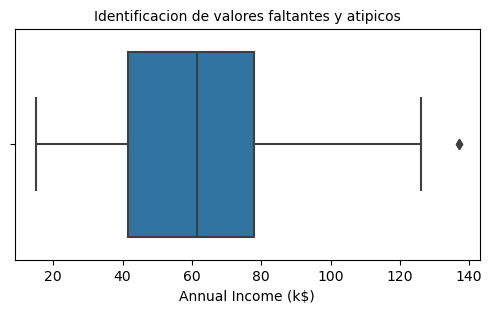

In [21]:
#IDENTIFICACION DE VALORES FALTANTES Y ATIPICOS
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificacion de valores faltantes y atipicos', fontsize= 10)

Text(0.5, 1.0, 'Identificacion de valores faltantes y atipicos')

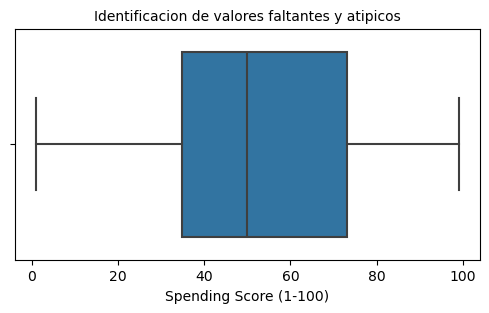

In [22]:
#IDENTIFICACION DE VALORES FALTANTES Y ATIPICOS
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Identificacion de valores faltantes y atipicos', fontsize= 10)

Text(0.5, 1.0, 'Identificacion de valores faltantes y atipicos')

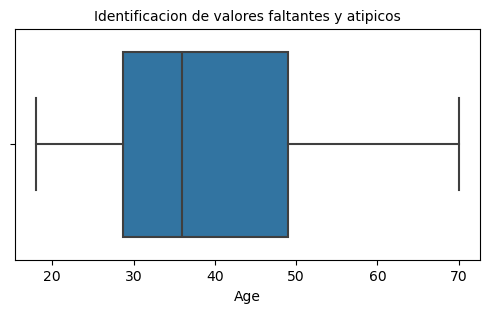

In [23]:
#IDENTIFICACION DE VALORES FALTANTES Y ATIPICOS
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificacion de valores faltantes y atipicos', fontsize= 10)

In [24]:
#2. Preprocesar los datos limpiándolos, tratando valores faltantes y 
#transformándolos según sea necesario. 
print("cantidad de registros en trestbps",Datos['Annual Income (k$)'].isin([0]).sum())
print("cantidad de registros en sex",Datos['Spending Score (1-100)'].isin([0]).sum())
print("cantidad de registros en cp",Datos['Age'].isin([0]).sum())

cantidad de registros en trestbps 0
cantidad de registros en sex 0
cantidad de registros en cp 0


In [25]:
#Reemplazar todos los ceros con el valor medio(promedio)de la columna
Datos['Annual Income (k$)']= Datos['Annual Income (k$)'].replace(0,Datos['Annual Income (k$)'].mean())
Datos['Spending Score (1-100)']= Datos['Spending Score (1-100)'].replace(0,Datos['Spending Score (1-100)'].mean())
Datos['Age']= Datos['Age'].replace(0,Datos['Age'].mean())

Text(0.5, 1.0, 'Identificacion de valores faltantes y atipicos')

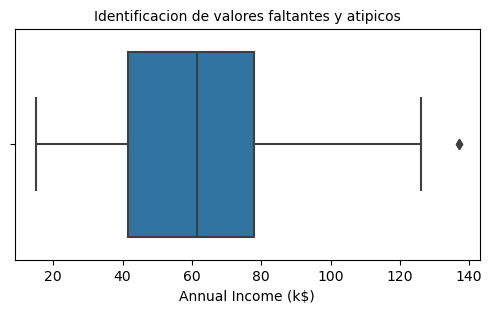

In [26]:
#IDENTIFICACION DE DATOS ATIPICOS
#IDENTIFICACION DE VALORES FALTANTES Y ATIPICOS
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificacion de valores faltantes y atipicos', fontsize= 10)

In [27]:
#conteo de datos atipicos
nivel_minimo=1
nivel_maximo=100
Total_Atipicos=((Datos['Annual Income (k$)']<nivel_minimo)|(Datos['Annual Income (k$)']>nivel_maximo)).sum()
print("el total de datos atipicos es: {}".format(Total_Atipicos))

el total de datos atipicos es: 14


In [28]:
#filtro de datos Atipicos
Datos=Datos[(Datos['Annual Income (k$)']<nivel_maximo)&(Datos['Annual Income (k$)']>nivel_minimo)]

In [29]:
#REVISION DEL TIPO DE DATOS Y DATOS FALTANTES
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 0 to 185
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              186 non-null    int64 
 1   Gender                  186 non-null    object
 2   Age                     186 non-null    int64 
 3   Annual Income (k$)      186 non-null    int64 
 4   Spending Score (1-100)  186 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.7+ KB


In [30]:
#3. Seleccionar las características más relevantes para entrenar el 
#modelo utilizando selección de características

#CARACTERISTICAS DE INTERES PARA EL AGRUPAMIENTO
#centro comercial: mall
#cliente: customer
#género: gender

#ingreso anual, Annual income
#puntaje de gasto, spending score

#FILTRAR COLUMNAS DEL MODELO
Datos=Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]]






In [31]:
#REVISION DE LOS DATOS DE LAS VARIABLES OBJETIVO
Datos.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


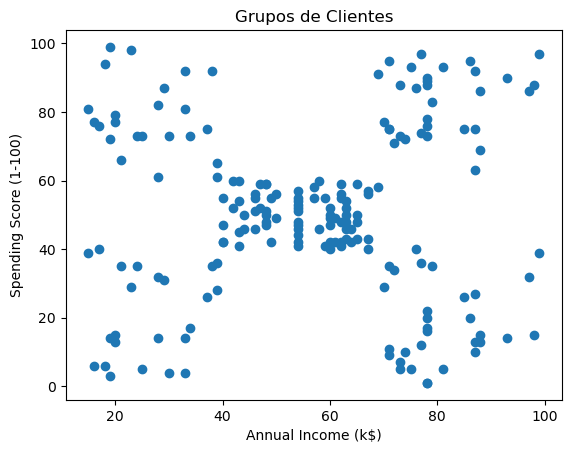

In [32]:
#GRAFICA ANTES DEL AGRUPAMIENTO
plt.scatter(Datos['Annual Income (k$)'],Datos['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de Clientes')
plt.show()


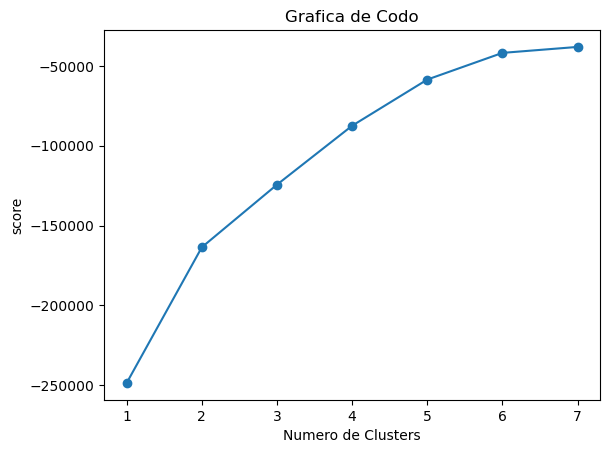

In [33]:
#4. Entrenar el modelo configurando los diferentes hiperparámetros.

#Se realza la rafica de codo para identificar el valor de K
Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Numero de Clusters')
plt.ylabel('score')
plt.title('Grafica de Codo')
plt.show()

In [34]:
#GENERACION DEL MODELO DE AGRUPAMIENTO DEL MODELO K = 5
Modelo= KMeans(n_clusters=7, random_state=0)
Modelo.fit(Datos)

KMeans(n_clusters=7, random_state=0)

In [35]:
#SE AGREGA LA COLUMNA GRUPO A LA BD PARA IDENTIFICAR EL NUMERO DE GRUPO DEL ARUPAMIENTO
Modelo.labels_
Datos["Grupo"] = Modelo.labels_
print(Datos)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      6
1     21                  15                      81      5
2     20                  16                       6      1
3     23                  16                      77      5
4     31                  17                      40      6
..   ...                 ...                     ...    ...
181   32                  97                      86      0
182   46                  98                      15      2
183   29                  98                      88      0
184   41                  99                      39      2
185   30                  99                      97      0

[186 rows x 4 columns]


In [38]:
#5. Evaluar el desempeño del modelo con métricas como 
#Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

#Preparacion de la metrica de  la columna grupo
Observaciones = len(Datos)
x= Datos.drop('Grupo', axis=1)
clusters = Datos['Grupo']

#se calculcan las metricas
sil_score = silhouette_score(x, clusters)
calinski_score = calinski_harabasz_score(x, clusters)
davies_score = davies_bouldin_score(x, clusters)

#se crea una tabla para mostrar los valores de las metricas
table_data = [
    ["Numero de observaciones", Observaciones],
    ["Coeficiente silhouette", sil_score],
    ["Indice calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

#Imprir tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "value"], tablefmt='pretty'))
    

+--------------------------+---------------------+
|          Metric          |        value        |
+--------------------------+---------------------+
| Numero de observaciones  |         186         |
|  Coeficiente silhouette  | 0.45560078593833014 |
| Indice calinski Harabasz | 164.74772753442204  |
|  Indice Davies Bouldin   | 0.7794993564158735  |
+--------------------------+---------------------+


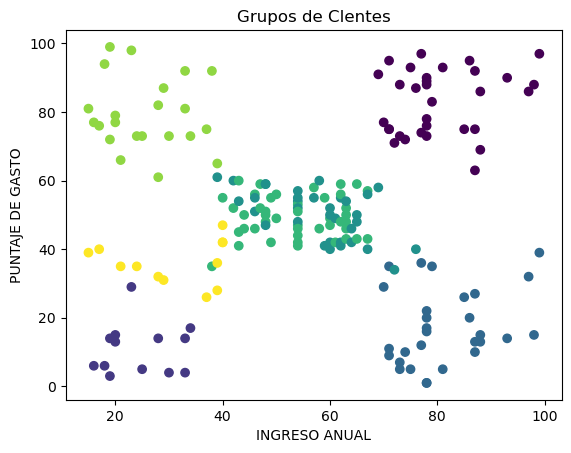

In [42]:
#6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'],c=Datos['Grupo'], cmap='viridis')
plt.xlabel('INGRESO ANUAL')
plt.ylabel('PUNTAJE DE GASTO')
plt.title('Grupos de Clentes')
plt.show()



In [ ]:
#LOS DATOS AGRUPADOS